### Central Limit Theorum

- A population (not necessarily normallly distributed).    
- Taking samples (of sufficient size) will result in normally distributed sample means.  




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env
import numpy as np

np.random.seed(3333)

In [2]:
# Define a roll of a die [1,2,3,4,5,6]

# Set a sample size of 10 (number of dice rolls in one row)

n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

data = np.random.randint(1,7, (nrows, ncols))

data[:4]
# shows for rows of data, not 100

array([[3, 6, 6, 2, 1, 3, 1, 4, 6, 3],
       [2, 3, 5, 6, 1, 6, 3, 1, 4, 6],
       [6, 5, 6, 6, 1, 6, 3, 3, 6, 6],
       [6, 2, 3, 2, 5, 3, 5, 5, 4, 5]])

In [3]:
calc_avgs = data.mean(axis = 1)
calc_avgs

array([3.5, 3.7, 4.8, 4. , 3.7, 3.8, 4.3, 3.4, 4.2, 3.3, 2.5, 4.2, 3.4,
       2.6, 4. , 2.9, 4.3, 3.4, 3.1, 2.9, 4. , 3.1, 2.7, 3.2, 3.2, 2.2,
       4.2, 2.9, 3.2, 3.5, 3.5, 3.8, 3.9, 3.8, 2.8, 4.5, 2.8, 3.4, 3.6,
       3.4, 3.8, 3.3, 3.8, 3. , 3. , 3.6, 3.8, 3.7, 4.1, 3.4, 3.3, 3.1,
       2.5, 4. , 3.4, 2.7, 3.9, 3.8, 2.8, 2.8, 3. , 3.8, 4.1, 3.5, 4.2,
       4.2, 2.9, 3.2, 3.2, 3.7, 3.7, 3.7, 3.1, 3.9, 3.5, 3.7, 4.2, 4.2,
       3.5, 2.9, 3.3, 3.1, 3.3, 4.2, 3.3, 2.3, 3.9, 3.4, 2.9, 4.2, 4.4,
       3.3, 3.4, 4.4, 3.3, 3.5, 4. , 2.7, 3.9, 3. ])

Text(0.5, 1.0, 'Outcome of averaging 10 dice rolls 100 times')

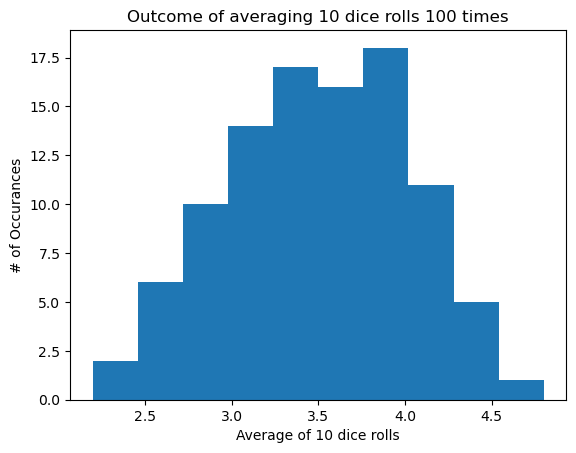

In [4]:
plt.hist(calc_avgs)

plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')

plt.ylabel('# of Occurances') # frequency of a given number being rolled

plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')

### <p style="color:red;"> One-Sample T-Test

1 / Plot distributions of each group being sampled  
2 / Establish the hypothesis 

### Assumptions

- Variance : equal or not equal ?

In [5]:

db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)

In [6]:
# View the columns in Telco_Churn

df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

<AxesSubplot:>

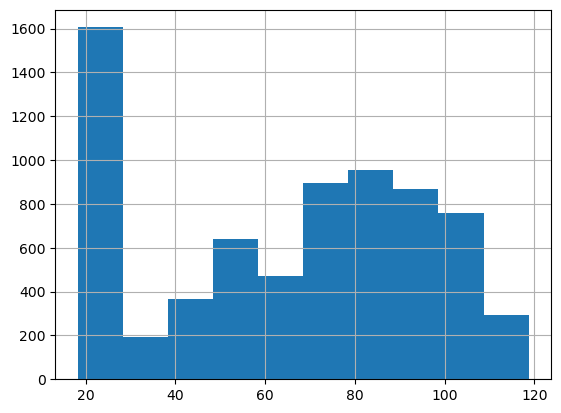

In [7]:
# Plot distribution of monthly charges using histogram

df.monthly_charges.hist()

### Statement : Customers who churn are charged more.

#### Null hypothesis ? 

H_0 = Mean of monthly charges of churned customers <= mean of monthly charges of all customers.

#### Alternate hypothesis ?


H_a = Mean of monthly charges for customers who churn > mean of monthly charges for all customers.

.

<AxesSubplot:>

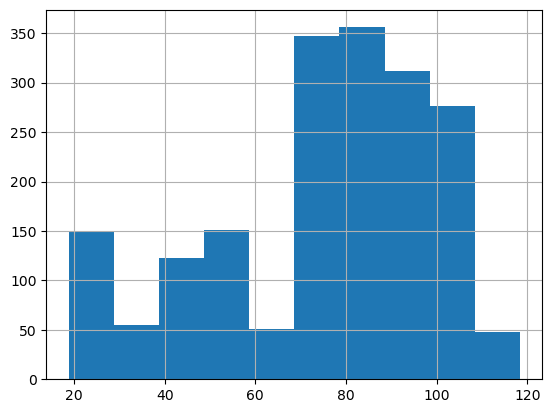

In [23]:
# Filter for a sample who churn
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()


### Set an alpha value

alpha = 0.05

### Verify an assumption of sample size


In [24]:

df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

### Distribution types

1-Tail : Has a direction : are we looking at the greater than or the less than (only one tail)  
2-Tail : Directionless : looking at both tails
        
- Our question is looking at one specific direction (are churn customers' charges higher ?), so it's a 1-tail .

In [10]:
alpha = 0.05

### Compute Test Statistic


In [25]:
# monthly charges of churned customers
churn_sample = df[df.churn == 'Yes'].monthly_charges

# the overall mean of all monthly charges for all customers
overall_mean = df.monthly_charges.mean()

In [44]:
overall_mean

64.7616924605992

In [26]:
churn_sample.head()

2     73.9
3     98.0
4     83.9
18    62.7
19    25.1
Name: monthly_charges, dtype: float64

In [27]:
# the output of a 1-tail, 1-sample T-Test.

# Specified the sample (churn_sample)
# Specified the overall_mean

stats.ttest_1samp(churn_sample, overall_mean)

# assign the output to 't' to represent the t-statistic, and to 'p' for the p-value :

t1, p1 = stats.ttest_1samp(churn_sample, overall_mean)

print(t1, p1/2, alpha)


# 1 tail since we are looking at a mean that is GREATER THAN the overall customer mean


# p/2 because it's a 1-tail test

16.96540308050567 1.8703196496911995e-60 0.05


## <p style="color:red;"> 1-TAIL, 1-SAMPLE TEST

### 1 tail and greater than
We will compare the p-value to the threshhold that we will set

### But first, we will look at the t-statistic : 
 Is it greater than zero ? (t > 0)

### Look at the p/2 (p divided by 2) : 
Is the calculated p-value that the t-test returned less than our alpha value ?

In [28]:
## example : the code itself has more than 1 value, thus 2 variables (t, p) are assigned

f = stats.ttest_1samp(churn_sample, overall_mean)
f

Ttest_1sampResult(statistic=16.96540308050567, pvalue=3.740639299382399e-60)

In [29]:
# The results based on t-statistic and on p-value

#### $H_{0}$ written as LaTex produces an H with a subscript zero.


if p1/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t1 < 0:
    print('We fail to reject the null hypothesis.')
else: 
    print('We reject the the null hypothesis.')


We reject the the null hypothesis.


$H_{0}$



### <p style="color:red;"> Example 2

Monthly charges of customers who churn are significantly different from all customers.

2-tail and not equal.

- 1-sample (looking at churning customers)
- 2-tailed test (looking at both directions : higher / lower costs ??)

$H_{0}$ : The mean of costs across all customers, churning or not, is not significantly different / is no different. (The expected population means are equal = 'The mean of costs across all customers is equal.')   
$H_{a}$ : The mean of costs for churned customers is not equal to the mean of costs for all-overall customers.

#### Monthly charges of churning customers are significantly different from overall customers ( = 1 sample ).

 Null : The mean of charges for churn = mean of charges for overall  
 Alternate : The mean of charges for churn ≠ mean of charges for overall
 
- If t-statistic is 0, the p-value divided by 2 will be higher than alpha.

In [30]:
## Set up the test, 
## Compute t-statistic and p-value

## Still using churn_sample
## Still using overall_mean

t2, p2 = stats.ttest_1samp(churn_sample, overall_mean)

# Output
t2 , p2 , alpha

## The only change is that the p-value is not divided by two : it's a 2-tailed test here.

## ... e-60 is a way to shortn very small numbers

(16.96540308050567, 3.740639299382399e-60, 0.05)

In [31]:
## Compare the calculated p-value to alpha

p2 < alpha
#True

## a very low p-value : reject the null hypothesis

if p2 < alpha:
    print("We reject the null hypothesis.")
    
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


### <p style="color:red;"> Exampel 3

##### 1-tail, 1-sample test and less than :
- Only looking at one side; the comparison is strictly '<', otherwise it would just be '≠'.

The monthly charge for customers <strong>WHO CHURN</strong> is less than the mean of all customers.

$H_{0}$ : Mean monthly chargest for customers who churn is greater than or equal to >= mean of monthly charge for all customers.  
$H_{a}$ : Mean monthly chargest for customers who churn is greater than or equal to < mean of monthly charge for all customers.   



In [32]:
t3, p3 = stats.ttest_1samp(churn_sample, overall_mean)

# Output
t3 , p3 , alpha

(16.96540308050567, 3.740639299382399e-60, 0.05)

In [33]:
# Is p3/2 less than zero ? 

print(p3/2 < alpha)


# Is t3 less than zero ? 

print(t3 < 0)

### --->>> To reject the null hyp : p3/2 < alpha AND t < 0

True
False


In [34]:
if (p3/2 < alpha) & (t3 < 0):
    print('We reject the null hypo.')
else:
    print('We fail to reject the null hypo.')

We fail to reject the null hypo.


#### Summary : 

1 sample (churn customers), 1 tail (churn customers only : compare alpha to p/2)

[[ If 2 tail : compare alpha to p ]]

### <p style="color:red;"> Example 4


### <p style="color:red;">Independent T-Test (aka, a 2-sample T-Test)

Comparing <strong>two samples</strong> : churned customers and customers who don't churn (different from customers overall)

Goal : 
- Compare mean of sample of *Group A* (customers who churn)   
- to mean of sample of *Group B* (customers who don't churn).  
.  
- Two samples from the same population  

Verify Assumptions : 
- Check that we have at least 30 observations.
- Independence of observations
- Equal variance  :
    - True - equal            
    - False - not equal


In [21]:
### Set the alpha value for comparison purposes

alpha = 0.05

In [39]:
### Find the variance of churn customers. 
### The variance is a measurement of how much spread there amongst data points, relative to the mean. 
### __Variance__ is the stddev squared.

print(churn_sample.var())


# Find the variance of those who did not churh
print(no_churn_sample.var())


## These are not equal, or even close.
## _____ Use equal_var = False ______

608.4141833954315
966.7527670734293


In [38]:
# Customers who did churn 

churn_sample = df[df.churn == 'Yes'].monthly_charges

# Customers who did not churn

no_churn_sample = df[df.churn == 'No'].monthly_charges


In [42]:
## 1-tail : one side of the comparison
## compare alpha and p/2

t4, p4 = stats.ttest_ind(churn_sample, no_churn_sample, equal_var = False)

t4, p4/2

# _ind = independent of each other : churn and no churn : compare the mean of two distinct groups (A & B)

(18.407526676414673, 4.296224665773525e-73)

In [ ]:
## Evaluate results : Is p4/2 less than α ?
# If p4/2 is less than α, we reject the null hypothesis.

print(p4/2 < alpha)

# Compare t-statistic : Is t > 0 ?
# If t4 is greater than 0, we reject the null hyp.

print(t4 > 0)



In [ ]:
### Conclusion :

if p4/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t4 < 0:
    print('We fail to reject the null hypothesis.')
else: 
    print('We reject the the null hypothesis.')

### Set The Hypothesis

Comparing two groups (samples) : That which churned (A) and that which did not (B).  
    
$H_{0}$ : Customers who churn are <strong>charged more monthly</strong> than customers who do not churn.  
    Group that churns <= Group that does not churn  (monthly charges)
    
$H_{a}$ : Customers who do not churn are <strong>charged the same</strong> as sutomers cho whunc.  
    Group that churns > Group that does not churn (monthly charges)

### Example 2

Are monthly charges for customers WHO CHURN significantly different from the monthly charges of those who DO NOT CHURN ?

H_0 : The monthly charges for those who churn are equal (=) to the monthly charges for those who do not churn.  
Ie, monthly charges are equal.  

H_a : The monthly charges for those who churn are not equal (≠) to the monthly charges for those who do not churn.  
Ie, monthly charges are not equal.  


### 2-Tailed
-    Compare p to alpha
- If p < alpha, reject H_0.


In [ ]:
## The test

## Equal vairnace

## Churn vs no-churn

t5, p5 = stats.ttest_ind(churn_sample, no_churn_sample, equal_var = False)
t5, p5


In [ ]:
## If p < alpha, reject H_0.
## P is less than α

print(p < alpha)

print('We reject the nulll hypothesis since p < α.')

### Example 3

Are charges for churn customers significantly LESS THAN charges for non-churn customers ?

H_0 : Mean monthly charges for churn customers are GREATER THAN OR EQUAL TO the mean for non-churn customers.

H_a : Mean monthly charges for churn customers are LESS THAN the mean for non-churn customers. 


#### 1-tailed : We're only looking for the churn being less than (not less and eauql to, or simply not equal to).



In [ ]:
#    Compare alpha to p6/2

t6, p6 = stats.ttest_ind(churn_sample, no_churn_sample, equal_var = False)

print(t6, p6)


# Two conditions to meet : 
    # p6/2 < α
    # t < 0



In [ ]:
# Is t-statistic < 0 ?

print("Is t < 0 ?", t < 0)


# Is p6/2 < alpha ?

print('Is p6/2 < alpha ?', p6/2 < alpha)

## <p style="color:red;"> ANOVA : Analysis Of Variance
    
    Like a t-test for more than 2 groups.

*Outcome* : Compare means of groups (R, T, Y, for example)

1. Plot distributions
2. Establish hypothesis
3. ...


#### Format for hypotheses

$H_0$ Null hypothesis - $\mu_{R} = \mu{T} = \mu_{Y}$  
$H_a$ Alternate hypothesis - $\mu_{R} \neq \mu{T} \neq \mu_{Y}$

#### Significance level
alpha = 0.05

#### Verify assumptions
- Normal distribution, or at least 30 observations
- Independent samples
- Equal variance

#### Syntax for test


```python
scipy.stats.f_oneway
```

#### Returns test statistics and a p-value.

In [ ]:
df = sns.load_dataset('iris')

df.info()

In [ ]:
# check the sample size

df.species.value_counts()

# Independent - belong to different species
# sample size - sufficient

In [ ]:
# Group R - setosa
# Group T - versicolor
# Group y - virginica

In [ ]:
## Statistical summary of sepal_length

df.sepal_length.describe()

In [ ]:
### Filter sepal_length by species

sepal_length_versicolor = df[df.species == 'versicolor'].sepal_length

sepal_length_setosa = df[df.species == 'setosa'].sepal_length

sepal_length_virginica = df[df.species == 'virginica'].sepal_length

In [ ]:
## Histograms

sepal_length_versicolor.hist(alpha = 0.7)
sepal_length_virginica.hist(alpha = 0.5)
sepal_length_setosa.hist(alpha = 0.5)

## State hypothesis

$H_0$ : The mean sepal length of all 3 Iris varieties is equal : versicolor = setosa = virginica  

$H_a$ : The mean sepal length of at least 2 of the 3 Iris varies is NOT equal.

In [ ]:

# Significance level

alpha = 0.05

# Independence ? 
# YES. They are different species.

# At least 30 observations for each group.
print(len(sepal_length_virginica)), 
print(len(sepal_length_versicolor))
print(len(sepal_length_setosa))

# Equal variance.
# How to test for EV ? 

#### How to test for EV ? Levene's Test

H_0 : Population variances of sepal length across all 3 species are equal.  

H_a : Population variance of sepal length is different amongst at least 2 of the species

In [ ]:
stats.levene(sepal_length_versicolor, sepal_length_virginica, sepal_length_setosa)

# P-value tells that mean population variances of sepal length is significantly 
# different amongst at least 2 of the species



*Because the p-value is less than α (0.05), we know that there is significant difference in variance in at least 2 of the groups.*

# Thus, ANOVA is not a recommended test model for this dataset, because assumptions are violated.

We will do it here to see what happens.

In practice, we would employ a non-parametric version of our test. In the case of an ANOVA, this would be a Kruskal-Wallis Test.

"Parametric tests assume a normal distribution of values, or a “bell-shaped curve.”" (https://www.sciencedirect.com/topics/medicine-and-dentistry/parametric-test)

In [ ]:
# running the ANOVA FOR FUN :

stats.f_oneway(sepal_length_versicolor, sepal_length_virginica, sepal_length_setosa)

# p-value is very low

In [ ]:
## Instead, prefer KRUSKAL-WALLIS :

stats.kruskal(sepal_length_versicolor, sepal_length_virginica, sepal_length_setosa)

# still get significance, but it's not as low as for the ANOVA.

Because variances are not equal, we would go with the Kruskal-Wallis Test.  
We still achieved significance here.  

Conclusion : There appears to be a significant difference in sepal length amongst at least 2 of the species.

In [ ]:
## Finding the mean sepal length

print(sepal_length_virginica.mean()), 
print(sepal_length_versicolor.mean())
print(sepal_length_setosa.mean())

In [ ]:
## to a t-test to determine p-value (comparing smallest differences, 
## to see if there are clear differences between the two smallest-difference groups)

stats.ttest_ind(sepal_length_versicolor, sepal_length_virginica, equal_var = False)

In [ ]:
stats.ttest_ind(sepal_length_versicolor, sepal_length_setosa, equal_var = False)

In comparing each group combination, we can see that there is a significant difference in the sepal length of each species, based on the p-value.

## Another example

In [ ]:
mpg = sns.load_dataset('mpg')
mpg.head()

In [ ]:
# Do we have nulls ?
mpg.isna().sum()

In [ ]:
# drop the nulls in HP  from the dataframe  using ~

mpg = mpg[~mpg.horsepower.isna()]
mpg.isna().sum()

In [ ]:
# Finding the countries of origin

mpg.origin.unique()

In [ ]:
# Finding how many from each country
mpg.origin.value_counts()

#### Is the horsepower of all vehicles different amongst the distinct origins of the vehicles ?

$H_0$ : The mean_horsepower_USA =  mean_horsepower_Japan = mean_horsepower_Europe

$H_a$ : The mean horsepowers from at least two coutries are significantly different.

*Assumptions*
1. At least 30 observations : met (see value counts above).  
2. Equal population variance across all three groups.  
3. Groups are independent of each other.  

In [ ]:
# let's look at the values of each of these and their histograms

mpg[mpg.origin == 'usa'].horsepower.hist(alpha = 0.5)
mpg[mpg.origin == 'japan'].horsepower.hist(alpha = 0.5)
mpg[mpg.origin == 'europe'].horsepower.hist(alpha = 0.5)

# y axis is frequency

In [ ]:
##creqte a series of horsepower for each country

usa = mpg[mpg.origin == 'usa'].horsepower

japan = mpg[mpg.origin == 'japan'].horsepower

europe = mpg[mpg.origin == 'europe'].horsepower

In [ ]:
usa

In [ ]:
## Validate the variance assumption 
# The Levene TEst

stats.levene(usa, japan, europe)



 #### With a low p-value, we can assume that the variances of the countries' horsepower is significantly different, across at least 2 of the countries.
Therefore, we should not use the ANOVA test, but should instead use the Kruskal-Wallis Test.

In [ ]:
test_statistic, p_value = stats.kruskal(usa, japan, europe)
p_value

With a p-value of < 0.05, we can say that there exists a significant difference between the horseposwer of vehicles in at least two of the countries.

- Compare two groups, USA and Japan :

$H_0$ : The horsepower of USA = hp_japan  
$H_a$ : horsepower_usa ≠ hp_japan

In [ ]:
## compare two groups to see if there is significance

tmpg, pmpg = stats.ttest_ind(usa, japan, equal_var = False)

In [ ]:
## compare japan and usa

if pmpg < 0.05:
    print(f'There is a significant difference in HP between vehicles from the USA and vehicles from Japan. (p-value: {pmpg})')
else:
    print(f'We failed to find a significant difference in HP between vehicles from the USA and vehicles from Japan. (p-value: {pmpg})')

In [ ]:
## compare japan and europe

tmpg, pmpg = stats.ttest_ind(japan, europe, equal_var = False)

if pmpg < 0.05:
    print(f'There is a significant difference in HP between vehicles from Europe and vehicles from Japan. (p-value: {pmpg})')
else:
    print(f'We failed to find a significant difference in HP between vehicles from Europe and vehicles from Japan. (p-value: {pmpg})')

In [ ]:
## compare usa and euorpe

tmpg, pmpg = stats.ttest_ind(usa, europe, equal_var = False)

if pmpg < 0.05:
    print(f'There is a significant difference in HP between vehicles from Europe and vehicles from USA. (p-value: {pmpg})')
else:
    print(f'We failed to find a significant difference in HP between vehicles from Europe and vehicles from USA. (p-value: {pmpg})')